# List 3

## Random graph

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from scipy.stats import binom
from scipy import stats
from scipy.optimize import curve_fit
import powerlaw
from scipy.special import comb

sns.set()

In [127]:
def hist_data(degree_sequence):
    degree_sequence = np.sort(degree_sequence)
    k = 1
    ys = []
    xs = []
    for i in range(len(degree_sequence)-1):
        if degree_sequence[i] == degree_sequence[i+1]:
            k+=1
            # ys.append(k)
        else:
            ys.append(k)
            xs.append(degree_sequence[i])
            k = 1
    return np.array(xs), np.array(ys)/sum(ys)

In [8]:
class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        self.add_nodes_from(range(n))
        self.add_edges_from(edges)
        return self

    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


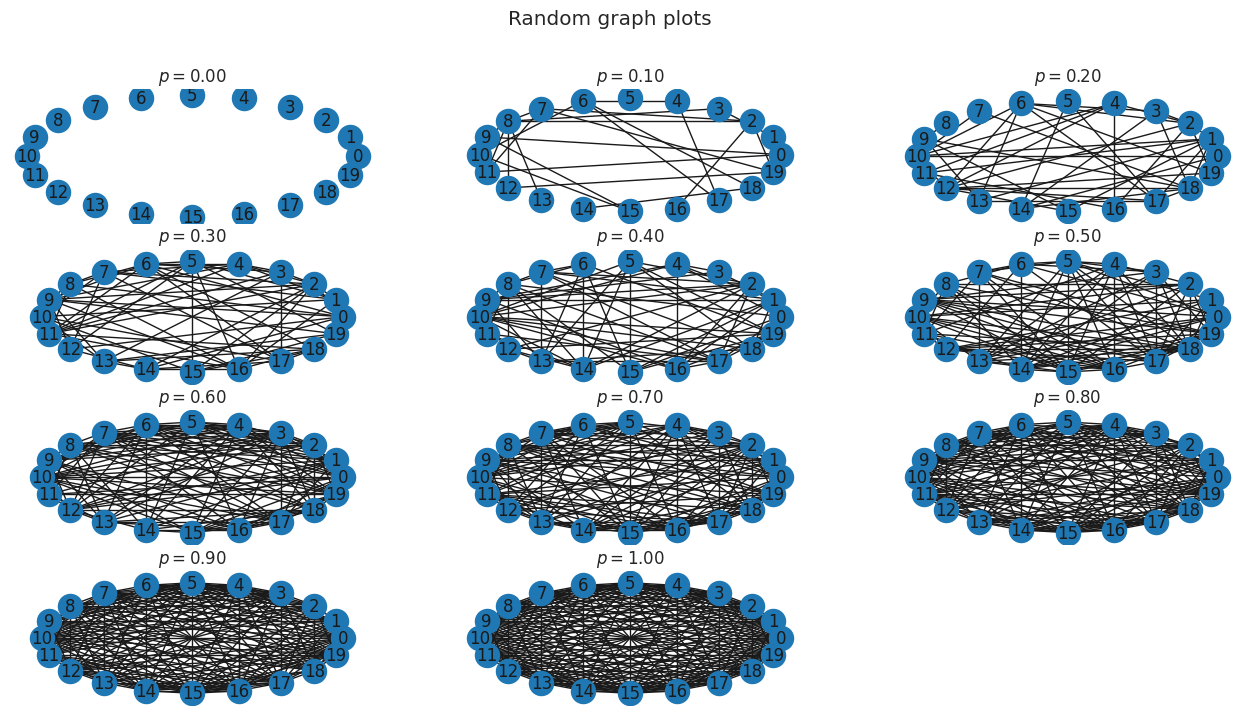

In [25]:
bvals = np.linspace(0,1,11)
N = 20
fig = plt.figure(figsize=(16,8))

for m, b in enumerate(bvals):
    plt.subplot(4,3,m+1)
    g1 = Graph().random_graph(N, b)
    plt.title(r"$p = %.2f$"%b)
    nx.draw_circular(g1, with_labels = True)
fig.suptitle("Random graph plots")
plt.show()

In [93]:
n = 4000
p = 0.1
g1 = Graph().random_graph(n, p)
g1.degree_sequence()
degree_sequence = g1.degree_sequence()
xs = np.arange(min(degree_sequence), max(degree_sequence),1)


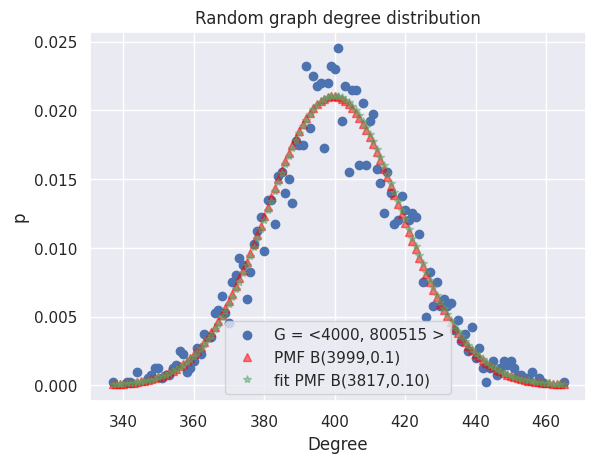

In [94]:
dist = stats.binom   
res = stats.fit(dist, degree_sequence, [[3500,4500], [0,1]])
fit_n,fit_p = res.params[0],res.params[1]

plt.scatter(*hist_data(degree_sequence), label = f"G = <{len(g1.nodes)}, {len(g1.edges)} >")                
# plt.hist(degree_sequence, density= True, bins = 15, label = f"G = <{len(g1.nodes)}, {len(g1.edges)} >") #histogram

plt.plot(xs, binom(n-1,p).pmf(xs), "^", c = "red", label = f"PMF B({n-1},{p})", alpha = 0.5)
plt.plot(xs, binom(fit_n, fit_p).pmf(xs), "*", c = "g", label = f"fit PMF B(%.d,%.2f)"%(fit_n, fit_p), alpha = 0.5)

plt.legend()
plt.xlabel("Degree")
plt.title("Random graph degree distribution")
plt.ylabel("p")
plt.xlabel("Degree")
plt.show()

In [95]:
print(f"""
nodes = {len(g1.nodes)},
edges = {len(g1.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")


nodes = 4000,
edges = 800515,
mean degre = 400.2575,
VAR degre = 376.41069374999995


## Watts-Strogatz model

In [96]:
class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self
    
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


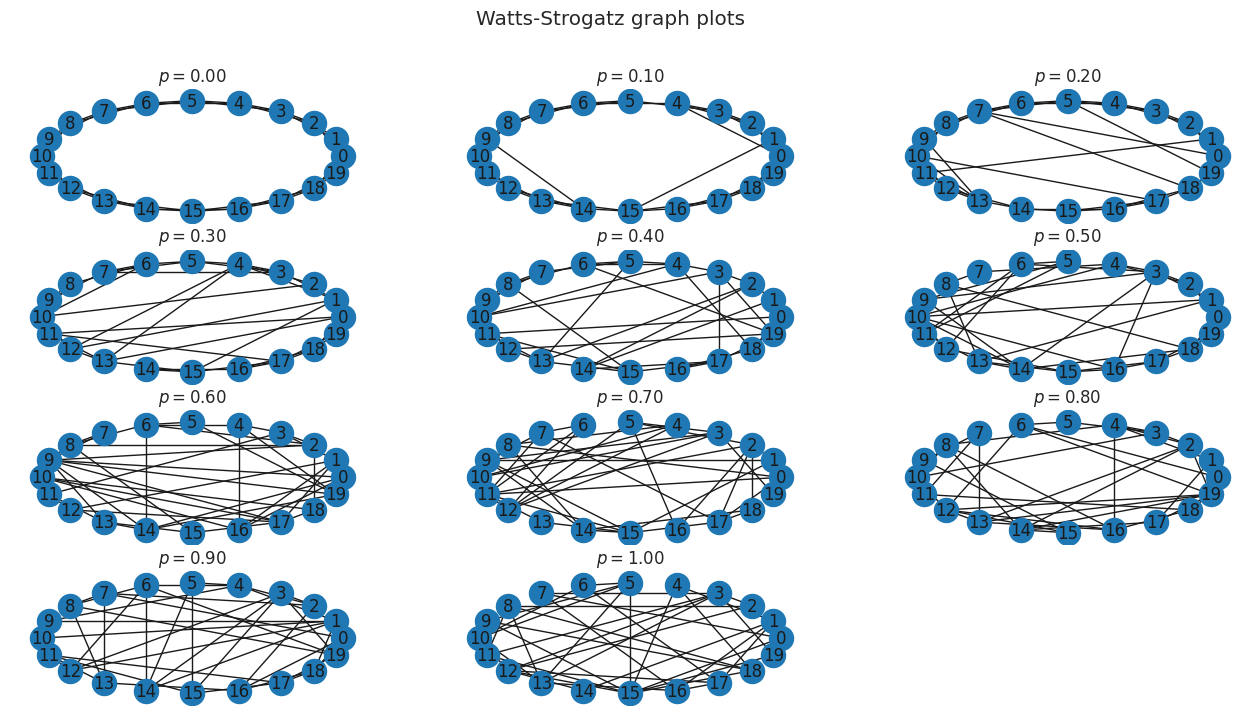

In [55]:
bvals = np.linspace(0,1,11)
n = 20
K = 4
fig = plt.figure(figsize=(16,8))
for m, b in enumerate(bvals):
    plt.subplot(4,3,m+1)
    g2 = Graph().Watts_Strogatz_model(n, K, b)
    plt.title(r"$p = %.2f$"%b)
    nx.draw_circular(g2, with_labels = True)
fig.suptitle("Watts-Strogatz graph plots")
plt.show()

In [97]:
def _density(k, K, p):
    pk = sum([comb(K/2, n )*(1-p)**n*p**(K/2-n)*(p*K/2)**(k-n-K/2)/np.math.factorial(int(k-n-K/2))*np.math.exp(-K/2*p) for n in range(int(min(k - K/2, K/2)+1)) ])
    return pk

def density(ks, K, p):
    return [_density(k, K, p ) for k in ks]


In [156]:
n = 3000
p = 0.2
K = 100
g2 = Graph().Watts_Strogatz_model(n, K, p)


degree_sequence = g2.degree_sequence()
xs = np.arange(min(degree_sequence), max(degree_sequence), 1)

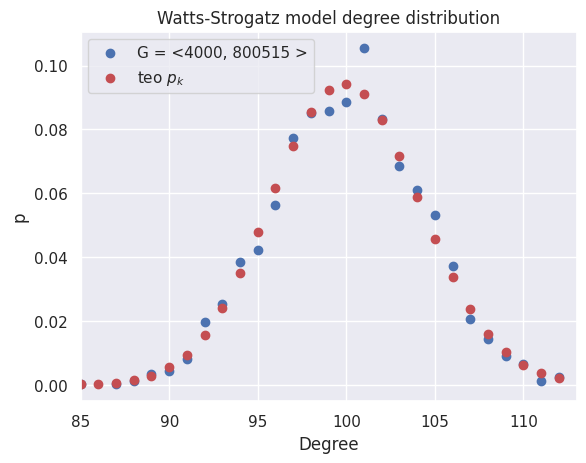

In [157]:
simulation = plt.scatter(*hist_data(degree_sequence), label = f"G = <{len(g1.nodes)}, {len(g1.edges)} >")                
plt.scatter(xs, density(xs, K, p), c= "r", label = "teo $p_k$")

plt.title("Watts-Strogatz model degree distribution")
plt.xlabel("Degree")
plt.ylabel("p")
plt.xlim(min(degree_sequence),max(degree_sequence))
plt.legend()
plt.show()

(array([100.98832638,   0.20511916]),
 array([[ 0.0004439 , -0.00015708],
        [-0.00015708,  0.00017525]]))

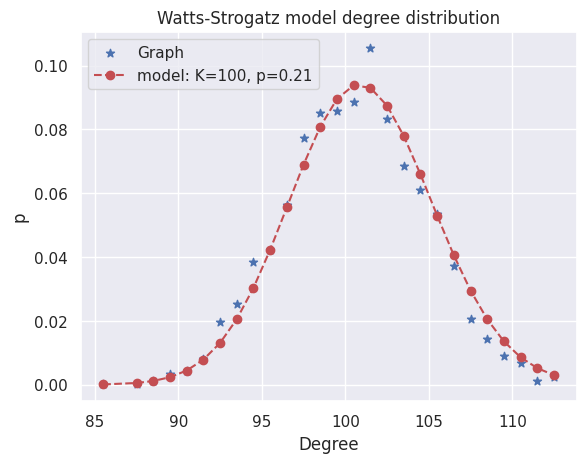

In [158]:
xdata, ydata = hist_data(degree_sequence)
xdata = xdata + 0.5
mean_dg = np.mean(degree_sequence)
std_dg = np.std(degree_sequence)

popt, pcov = curve_fit(density, xdata, ydata, p0 = [mean_dg, 0.5],bounds= [[mean_dg - std_dg, 0],[mean_dg + std_dg, 1]])

plt.scatter(xdata , ydata, marker = '*', label='Graph')
plt.plot(xdata  , density(xdata, popt[0], popt[1]), 'o--', c = "r", label=f'model: K=%.02d, p=%.02f'%(popt[0], popt[1]) )
plt.title("Watts-Strogatz model degree distribution")
plt.ylabel("p")
plt.xlabel("Degree")
plt.legend()
popt, pcov


In [159]:
print(f"""
nodes = {len(g2.nodes)},
edges = {len(g2.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")


nodes = 3000,
edges = 150000,
mean degre = 100.0,
VAR degre = 17.358666666666668


## Barabasi-Albert model

In [161]:
class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self

    def barabasi_albert_model(self, m0, n, iterations, inicial_praph = None):
        if inicial_praph:
            g = inicial_praph
        else:
            g = nx.complete_graph(m0)
        degrees = {note:degre for note,degre in g.degree() }
        for node in range(m0, m0 + iterations):
            values = np.array(list(degrees.values()))
            nodes_to_conect = np.random.choice(list(degrees.keys()), size = n, replace=False, p = values/sum(values))
            degrees[node] = n
            for node_to_conect in nodes_to_conect:
                degrees[node_to_conect] += 1
            g.add_edges_from([[node, i] for i in nodes_to_conect ])
        return g
        
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


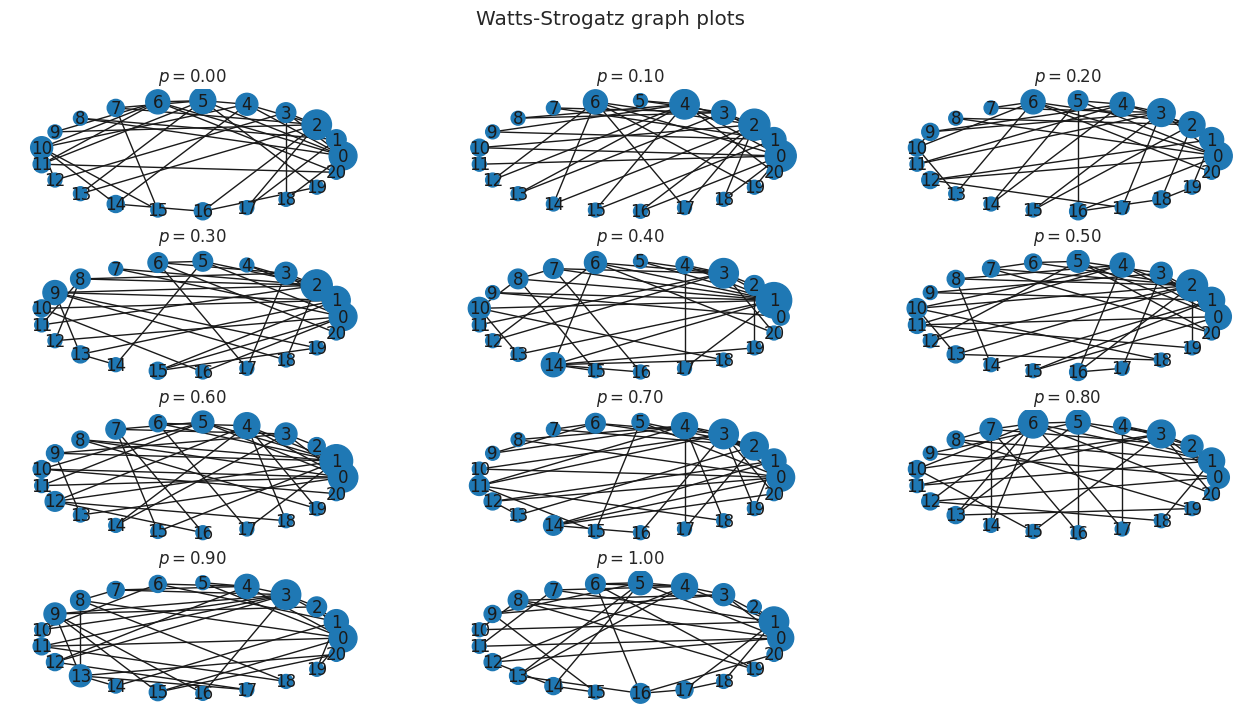

In [162]:
bvals = np.linspace(0,1,11)
m0 = 3
n = 2
iterations  = 18
fig = plt.figure(figsize=(16,8))
for m, b in enumerate(bvals):
    plt.subplot(4,3,m+1)
    g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)
    plt.title(r"$p = %.2f$"%b)
    # nx.draw_circular(g1, with_labels = True)
    nx.draw_circular(g3, with_labels = True, node_size=[v * 50 for v in dict(g3.degree()).values()])
    
fig.suptitle("Watts-Strogatz graph plots")
plt.show()

In [168]:
m0 = 10
n = 2
iterations  = 5000
g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)  # degree sequence
xdata, ydata = hist_data(degree_sequence)


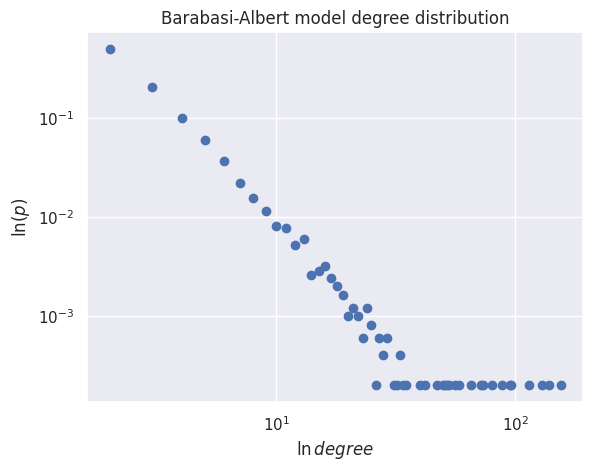

In [170]:
plt.scatter(xdata, ydata)
plt.yscale("log")
plt.xscale("log")
plt.title("Barabasi-Albert model degree distribution")
plt.xlabel("$\\ln degree$")
plt.ylabel("$\\ln(p)$")
plt.show()

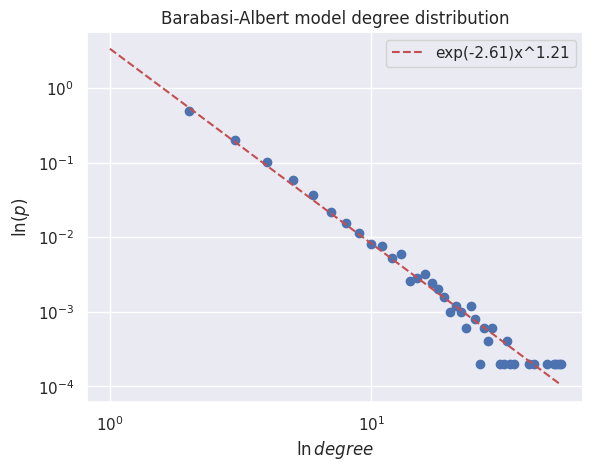

In [175]:
tail = 40
bins_mean_tail = xdata[:tail]
n_tail = ydata[:tail]

plt.scatter(bins_mean_tail, n_tail)
ln_bins_mean_tail = np.log(bins_mean_tail)
ln_n_tail = np.log(n_tail)
idx = np.isfinite(ln_bins_mean_tail) & np.isfinite( ln_n_tail )

a,b = np.polyfit(ln_bins_mean_tail[idx], ln_n_tail[idx], 1)
xs = np.linspace(1,max(bins_mean_tail),100)
ys = np.exp(b)*xs**a
plt.plot(xs, ys, "r--" , label = "exp(%.2f)x^%.2f"%(a,b))

plt.ylabel("p")

plt.xscale("log")
plt.yscale("log")
plt.title("Barabasi-Albert model degree distribution")
plt.xlabel("Degree")
plt.legend()
plt.ylabel("$\\ln(p)$")
plt.xlabel("$\\ln degree$")
plt.show()


In [176]:
print(f"""
nodes = {len(g3.nodes)},
edges = {len(g3.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")


nodes = 5010,
edges = 10045,
mean degre = 4.009980039920159,
VAR degre = 44.85419181596887
